In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Create feature set and target set
x=df.iloc[:,3:13]
y=df.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
#Categorical Encoding using Dummies
geography = pd.get_dummies(x["Geography"],drop_first=True)
gender = pd.get_dummies(x["Gender"],drop_first=True)
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [5]:
# Concatenate the Data Frames
x=pd.concat([x,geography,gender],axis=1)
# Drop Unnecessary Columns
x=x.drop(['Geography','Gender'],axis=1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [6]:
#Splitting the dataset into the Training set and Test Set
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=1)

In [7]:
# Feature scaling to reduce the time for Calculation of Weights
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## All Preprocessing Steps are Completed

## Creation Of ANN Model

In [8]:
# Importing the Keras Libraries and Packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [9]:
#Initializing the ANN
classifier = Sequential()

In [10]:
# Adding the Input layer and the first Hidden Layer
classifier.add(Dense(6,kernel_initializer='he_uniform' , activation='relu',input_dim=11))

In [11]:
classifier.add(Dense(6,kernel_initializer='he_uniform' , activation='relu'))
classifier.add(Dense(1,kernel_initializer='glorot_uniform' , activation='sigmoid'))

In [12]:
classifier.compile(optimizer='Adamax' , loss='binary_crossentropy' , metrics=['accuracy'])

In [13]:
model_history = classifier.fit(x_train , y_train , validation_split=0.33 , batch_size=10 , epochs=10)

Epoch 1/10
536/536 [==============================] - 1s 1ms/step - loss: 0.6224 - accuracy: 0.7932 - val_loss: 0.5762 - val_accuracy: 0.8023
Epoch 2/10
536/536 [==============================] - 0s 886us/step - loss: 0.5622 - accuracy: 0.7947 - val_loss: 0.5297 - val_accuracy: 0.8023
Epoch 3/10
536/536 [==============================] - 0s 898us/step - loss: 0.5228 - accuracy: 0.7947 - val_loss: 0.5013 - val_accuracy: 0.8023
Epoch 4/10
536/536 [==============================] - 0s 893us/step - loss: 0.4985 - accuracy: 0.7947 - val_loss: 0.4841 - val_accuracy: 0.8023
Epoch 5/10
536/536 [==============================] - 0s 893us/step - loss: 0.4832 - accuracy: 0.7947 - val_loss: 0.4722 - val_accuracy: 0.8023
Epoch 6/10
536/536 [==============================] - 0s 889us/step - loss: 0.4723 - accuracy: 0.7947 - val_loss: 0.4633 - val_accuracy: 0.8023
Epoch 7/10
536/536 [==============================] - 0s 896us/step - loss: 0.4642 - accuracy: 0.7947 - val_loss: 0.4566 - val_accuracy: 0

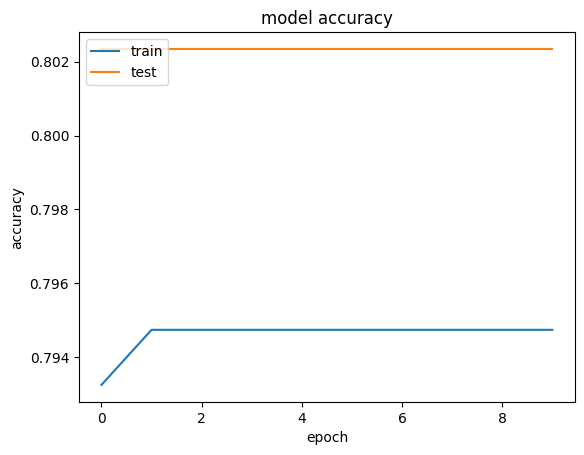

In [14]:
# Summarize history for Accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'] , loc='upper left')
plt.show()

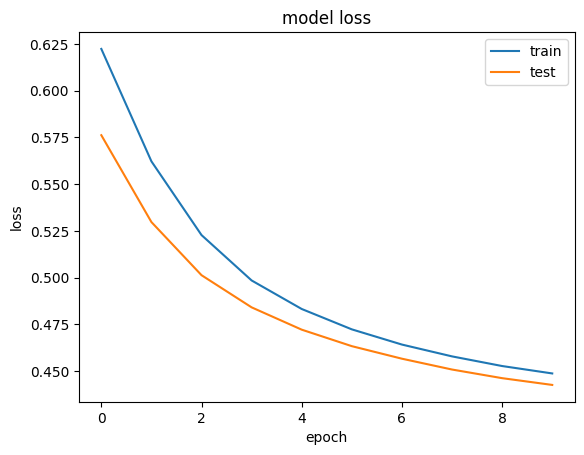

In [15]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'] , loc='upper right')
plt.show()